In [1]:
import tensorflow as tf
from tensorflow import keras

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
test_labels.shape

(10000,)

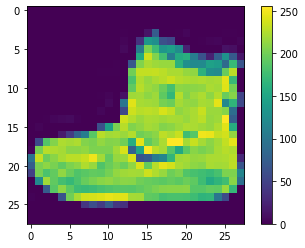

In [23]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [24]:
train_images = train_images / 255.0
test_images = test_images / 255.0

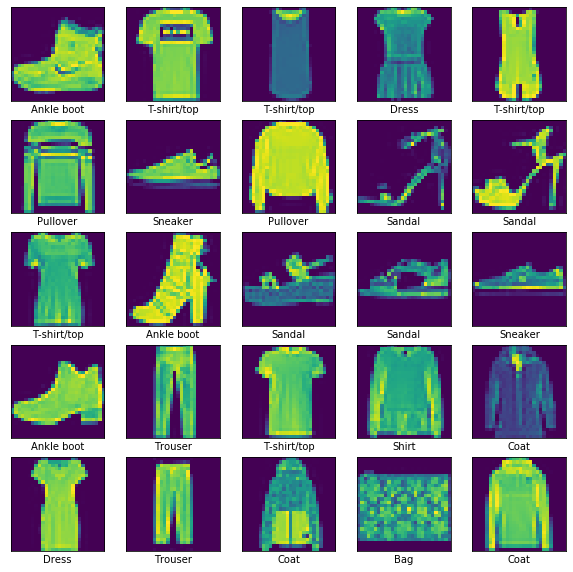

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Model

In [30]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), 
                          keras.layers.Dense(128, activation='relu'), 
                         keras.layers.Dense(10)])

### Compiling

In [32]:
model.compile(optimizer= 'adam', 
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics= ['accuracy'])

### Training the model

In [34]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4982 - accuracy: 0.8235
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3749 - accuracy: 0.8655
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3358 - accuracy: 0.8776
Epoch 4/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3104 - accuracy: 0.8865s - loss:
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2929 - accuracy: 0.8921
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2789 - accuracy: 0.8970
Epoch 7/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2669 - accuracy: 0.9016
Epoch 8/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2564 - accuracy: 0.9037
Epoch 9/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2494 - accuracy: 0.9082
Epoc

### Evaluating Accuracy

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('/n Test accuracy:', test_acc)

10000/1 - 0s - loss: 0.2497 - accuracy: 0.8806
/n Test accuracy: 0.8806


### Making Predictions

In [37]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [39]:
predictions = probability_model.predict(test_images)

In [41]:
predictions[0]

array([2.6908287e-09, 1.5158078e-10, 1.0989149e-11, 1.8219442e-11,
       8.4288757e-11, 4.9730992e-05, 7.0907241e-10, 3.2968824e-03,
       8.0275404e-09, 9.9665338e-01], dtype=float32)

In [42]:
np.argmax(predictions[0])

9

In [43]:
test_labels[0]

9

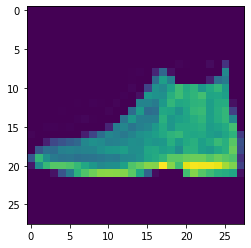

In [45]:
plt.imshow(test_images[0])
plt.show()

In [47]:
class_names[9]

'Ankle boot'